In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris = load_iris()

x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])


# Split the data into train and Test
from sklearn.model_selection import train_test_split

x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(x_vals,y_vals,test_size=0.2,random_state=42)

# Declare batch size
batch_size = 100

A = tf.Variable(tf.random.normal(shape = [2,1]))
b = tf.Variable(tf.random.normal(shape = [1,1]))

optimizer = tf.optimizers.SGD(0.01)
loss = []

for i in range(5000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    
    rand_x = tf.cast(tf.constant(rand_x),tf.float32)
    rand_y = tf.cast(tf.expand_dims(tf.constant(rand_y),1),tf.float32)
    
    with tf.GradientTape() as t:
                # Declare model operations
        model_output = tf.subtract(tf.matmul(rand_x, A), b)
        
        # Declare vector L2 'norm' function squared
        l2_norm = tf.reduce_sum(tf.square(A))

        # Declare loss function
        # = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
        # L2 regularization parameter, alpha
        alpha = tf.constant([0.01])

        # Margin term in loss
        classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, rand_y))))

        # Put terms together
        curr_loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
        
    grads = t.gradient(curr_loss,[A,b])
    optimizer.apply_gradients(zip(grads,[A,b]))
    
    if((i %10) ==0):
        loss.append(curr_loss.numpy())

In [3]:
loss[:10]

[array([3.4350555], dtype=float32),
 array([3.4304132], dtype=float32),
 array([3.0775015], dtype=float32),
 array([2.3976607], dtype=float32),
 array([1.9555234], dtype=float32),
 array([2.3113036], dtype=float32),
 array([1.5532366], dtype=float32),
 array([1.2785594], dtype=float32),
 array([0.8955533], dtype=float32),
 array([0.69556683], dtype=float32)]

In [4]:
a = np.squeeze(A.numpy()).tolist()

In [5]:
a1 = a[0]
a2 = a[1]

b = np.squeeze(b.numpy()).tolist()

slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

# Get best fit line
best_fit = []

In [6]:
for i in x1_vals:
  best_fit.append(slope*i+y_intercept)

In [7]:
import matplotlib.pyplot as plt

setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]


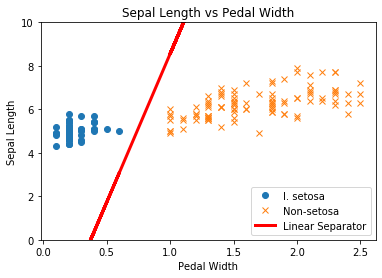

In [8]:
# Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()